Trajectory at episode 0


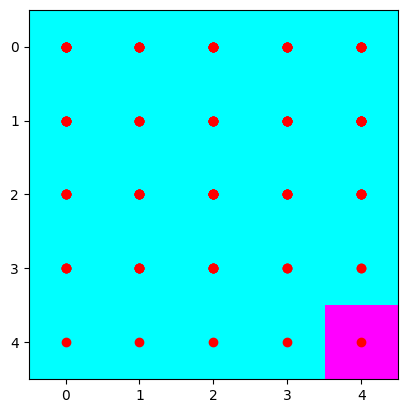

Trajectory at episode 100


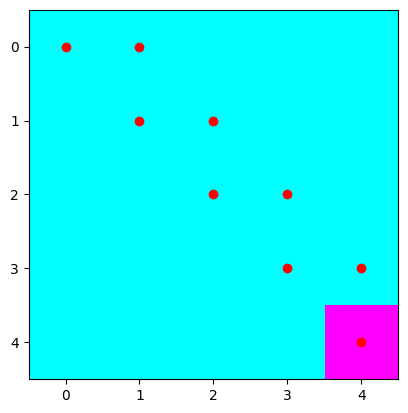

Trajectory at episode 200


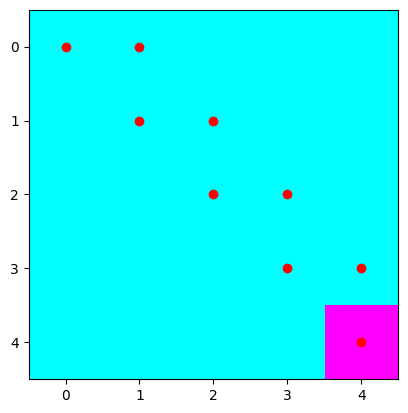

Trajectory at episode 300


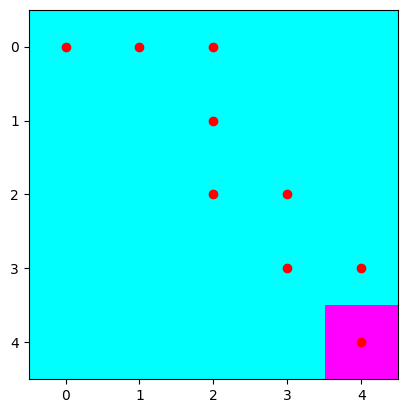

Trajectory at episode 400


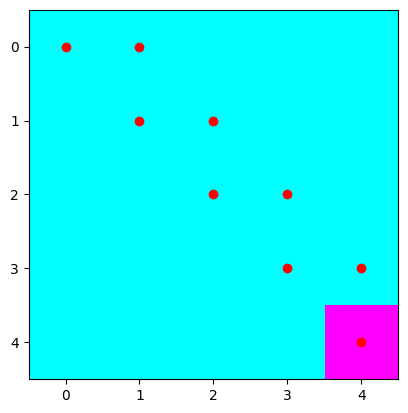

Learned Policy Map:
[['R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'D' 'D' 'D']
 ['R' 'R' 'R' 'D' 'D']
 ['D' 'R' 'R' 'R' 'D']
 ['D' 'R' 'R' 'R' 'U']]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Grid Environment Setup
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # Start in top-left corner
        self.goal = (size-1, size-1)  # Goal in bottom-right corner
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -0.1  # Reward of 1 at goal, else small penalty
        done = self.state == self.goal
        return self.state, reward, done

    def render(self, trajectory=None):
        grid = np.zeros((self.size, self.size))
        x, y = self.state
        grid[x, y] = 0.5  # Current position
        grid[self.goal] = 1.0  # Goal
        plt.imshow(grid, cmap='cool', interpolation='nearest')
        if trajectory:
            for t in trajectory:
                plt.plot(t[1], t[0], 'ro')  # Plot the trajectory
        plt.show()

# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.q_table = np.zeros((env.size, env.size, len(env.actions)))  # Q-table

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)  # Exploration
        else:
            x, y = state
            return self.env.actions[np.argmax(self.q_table[x, y])]  # Exploitation

    def update(self, state, action, reward, next_state):
        x, y = state
        next_x, next_y = next_state
        action_idx = self.env.actions.index(action)
        best_next_action = np.max(self.q_table[next_x, next_y])
        td_target = reward + self.gamma * best_next_action
        td_error = td_target - self.q_table[x, y, action_idx]
        self.q_table[x, y, action_idx] += self.alpha * td_error

# Training the Q-Learning Agent
def train(agent, env, episodes=500):
    trajectories = []
    for episode in range(episodes):
        state = env.reset()
        trajectory = [state]
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update(state, action, reward, next_state)
            state = next_state
            trajectory.append(state)
        if episode % 100 == 0:
            trajectories.append(trajectory)
    return trajectories

# Visualizing the Policy Map
def visualize_policy(agent):
    policy_grid = np.zeros((agent.env.size, agent.env.size), dtype=str)
    for i in range(agent.env.size):
        for j in range(agent.env.size):
            best_action_idx = np.argmax(agent.q_table[i, j])
            policy_grid[i, j] = agent.env.actions[best_action_idx][0].upper()
    return policy_grid

# Main Execution
if __name__ == '__main__':
    env = GridWorld(size=5)
    agent = QLearningAgent(env)

    # Train the agent and capture trajectories at intervals
    trajectories = train(agent, env)

    # Visualize learning process (trajectory of the agent at different stages)
    for i, trajectory in enumerate(trajectories):
        print(f"Trajectory at episode {i*100}")
        env.render(trajectory)

    # Visualize policy map
    policy = visualize_policy(agent)
    print("Learned Policy Map:")
    print(policy)
